<a href="https://colab.research.google.com/github/raisaurabh44/My_project/blob/main/PCA_Digits_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA : Principal component analysis

Dimentionality Reduction, Unsupervised mainly (Used in Both)

Dimension= No of input variables or no of columns

Way of converting higher dimensional dat to ower dimenson data , basically for visualization

There is also information gain , no data is lost

# Steps in PCA
1. Standardize the data ( Standard Scaler , MinMaxScaler)
2. Compute the covariance
(1). variance - spred of data
(2). covariance - it calculates how 2 variable vary
3. Compute the eigen value and eigen vactors
(1). EValues-> Magnitude
(2). EVector-> Directions
4. Select the no of PC's -> Scree plot
5. Modal fiting




In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.datasets import load_digits

In [3]:
digits= load_digits()

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [9]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [10]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

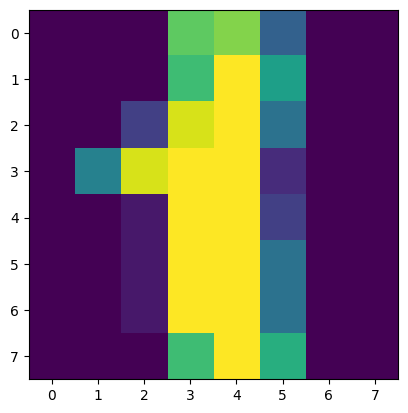

In [11]:
plt.imshow(digits.images[1])

In [13]:
x = pd.DataFrame(digits.data)

x

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


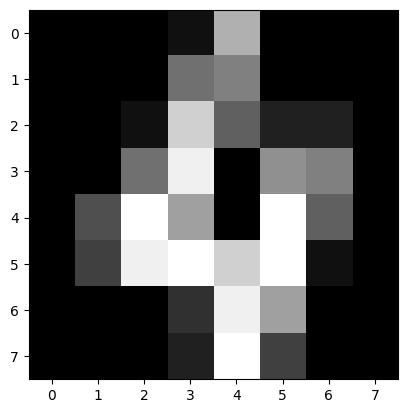

In [44]:
plt.imshow(digits.images[4], cmap='gray')

plt.show()

In [17]:
y=pd.DataFrame(digits.target)

y

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [21]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

x_std= sc.fit_transform(x)

x_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [23]:
x_std.shape

(1797, 64)

In [25]:
# Transpose
x1= x_std.T

x1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33501649, -0.33501649, -0.33501649, ..., -0.33501649,
        -0.33501649, -0.33501649],
       [-0.04308102, -1.09493684, -1.09493684, ..., -0.88456568,
        -0.67419451,  1.00877481],
       ...,
       [-1.14664746,  0.54856067,  1.56568555, ..., -0.12952258,
         0.8876023 ,  0.8876023 ],
       [-0.5056698 , -0.5056698 ,  1.6951369 , ..., -0.5056698 ,
        -0.5056698 , -0.26113572],
       [-0.19600752, -0.19600752, -0.19600752, ..., -0.19600752,
        -0.19600752, -0.19600752]])

In [26]:
x1.shape

(64, 1797)

In [27]:
# Covariance matrix

cov= np.cov(x1)

cov.shape

(64, 64)

Computing the EValue and EVactor

In [28]:
eigen_values, eigen_vactor = np.linalg.eig(cov)

In [29]:
print(eigen_values)

[7.34477606 5.83549054 5.15396118 3.96623597 2.9663452  2.57204442
 2.40600941 2.06867355 1.82993314 1.78951739 1.69784616 1.57287889
 1.38870781 1.35933609 1.32152536 1.16829176 1.08368678 0.99977862
 0.97438293 0.90891242 0.82271926 0.77631014 0.71155675 0.64552365
 0.59527399 0.5765018  0.52673155 0.5106363  0.48686381 0.45560107
 0.44285155 0.42230086 0.3991063  0.39110111 0.36094517 0.34860306
 0.3195963  0.05037444 0.29406627 0.27692285 0.06328961 0.258273
 0.24783029 0.2423566  0.07635394 0.08246812 0.09018543 0.09840876
 0.10250434 0.11188655 0.11932898 0.12426371 0.13321081 0.14311427
 0.217582   0.15818474 0.16875236 0.20799593 0.17612894 0.2000909
 0.18983516 0.         0.         0.        ]


In [30]:
len(eigen_values)

64

In [32]:
# Total

total = sum(eigen_values)

total

61.03396436525629

In [41]:
explained_variance= [(i/total)*100 for i in eigen_values]

explained_variance

#len(explained_variance)

[12.033916097734904,
 9.561054403097883,
 8.444414892624566,
 6.498407907524167,
 4.860154875966403,
 4.214119869271944,
 3.9420828035674003,
 3.3893809246383264,
 2.998221011625232,
 2.9320025512522068,
 2.781805463550326,
 2.5770550925819995,
 2.2753033157642486,
 2.227179739514353,
 2.1652294318492435,
 1.9141666064421259,
 1.7755470851681938,
 1.6380692742844212,
 1.5964601688623428,
 1.4891911870878194,
 1.3479695658179378,
 1.2719313702347599,
 1.1658373505919493,
 1.0576465985363224,
 0.9753159471981139,
 0.9445589897319981,
 0.8630138269707229,
 0.8366428536685183,
 0.7976932484112456,
 0.7464713709260611,
 0.725582151370274,
 0.691911245481183,
 0.6539085355726172,
 0.640792573845988,
 0.5913841117223424,
 0.571162405223525,
 0.5236368034166339,
 0.08253509448180278,
 0.48180758644514254,
 0.45371925985845096,
 0.10369573015571817,
 0.42316275323278085,
 0.4060530699790386,
 0.39708480827582743,
 0.12510074249730116,
 0.13511841133708546,
 0.14776269410608744,
 0.1612360622567

In [42]:
cum_var_exp= np.cumsum(explained_variance)

cum_var_exp

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  93.80175675,  94.28356433,  94.73728359,
        94.84097932,  95.26414208,  95.67019515,  96.06727995,
        96.1923807 ,  96.32749911,  96.4752618 ,  96.63649786,
        96.80444425,  96.98776275,  97.18327518,  97.38687281,
        97.60512967,  97.83961267,  98.19610598,  98.45528092,
        98.73177018,  99.07255736,  99.36113266,  99.68896799,
       100.        , 100.        , 100.        , 100.  

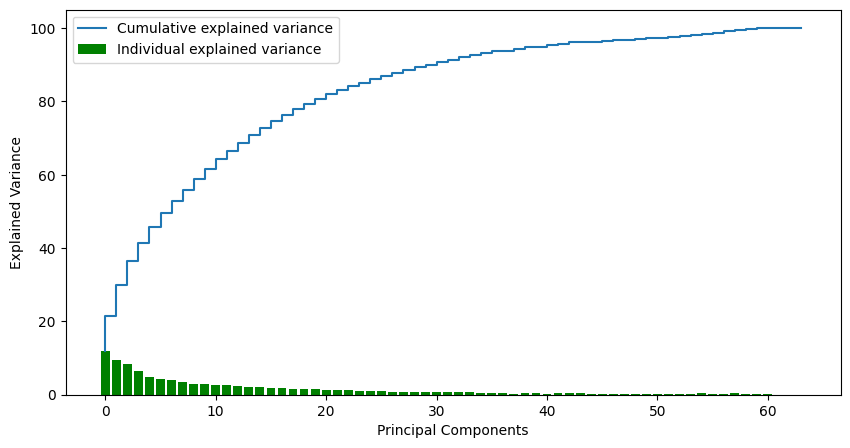

In [43]:
# Scree Plot

plt.figure(figsize=(10, 5))

plt.bar(range(len(explained_variance)), explained_variance, label='Individual explained variance', color='g')

plt.step(range(len(cum_var_exp)), cum_var_exp, label='Cumulative explained variance')

plt.xlabel('Principal Components')

plt.ylabel('Explained Variance')

plt.legend()

plt.show()


In [49]:
from sklearn.decomposition import PCA

pca=PCA(0.95)

x_pca= pca.fit_transform(x_std)

x_pca.shape

(1797, 40)

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=10 )

In [51]:
x_train.shape

(1437, 40)

In [61]:
from warnings import filterwarnings

filterwarnings('ignore')


In [80]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)

lr_pred= lr.predict(x_test)

lr_pred

array([5, 2, 5, 4, 8, 2, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 2, 5, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 9,
       2, 3, 6, 1, 9, 4, 4, 5, 8, 4, 8, 5, 9, 7, 8, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 5, 4, 6, 0, 8, 8, 1, 2, 7, 9, 9, 5, 2, 3, 3, 8, 7, 6,
       2, 5, 4, 3, 3, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 4, 6, 1, 1, 1, 4, 0,
       8, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 5, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
       0, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 4, 5, 6, 1, 9, 7, 0, 8, 6, 2, 0, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 1, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [56]:
from sklearn.metrics import *

accuracy_score(y_test, lr_pred)

0.9611111111111111

In [57]:
confusion_matrix(y_test, lr_pred)

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  2,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 38,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 32,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 39,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  1,  0, 30,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 37]])

In [59]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.94      0.91      0.93        34
           2       0.89      1.00      0.94        34
           3       1.00      0.95      0.97        40
           4       0.97      0.94      0.96        34
           5       0.94      1.00      0.97        32
           6       0.97      0.97      0.97        37
           7       1.00      0.97      0.99        40
           8       0.91      0.91      0.91        33
           9       0.97      0.95      0.96        39

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [60]:
compare = pd.DataFrame()

compare['Actual']=y_test

compare['Predicted']=lr_pred

compare

,Actual,Predicted
763,5,5
278,2,2
1535,5,5
1777,4,4
123,8,8
...,...,...
359,3,3
133,3,3
1382,6,6
1609,6,6


In [69]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train, y_train)

dt_pred = dt.predict(x_test)

dt_pred

array([5, 2, 5, 4, 8, 2, 4, 3, 3, 0, 4, 7, 0, 0, 8, 6, 8, 7, 9, 7, 1, 6,
       6, 7, 2, 9, 5, 7, 9, 0, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 3,
       8, 3, 6, 5, 9, 4, 4, 9, 8, 4, 2, 5, 7, 7, 1, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 2, 1, 0, 7, 3, 6, 2, 2, 6, 8, 8, 0, 1, 1, 2, 5,
       8, 8, 2, 6, 3, 4, 7, 9, 6, 2, 0, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       7, 3, 7, 1, 9, 4, 4, 0, 5, 8, 8, 1, 7, 9, 9, 5, 2, 3, 3, 8, 7, 6,
       2, 3, 4, 9, 5, 0, 6, 7, 2, 7, 4, 9, 5, 1, 9, 4, 5, 1, 4, 1, 4, 0,
       7, 9, 5, 2, 3, 3, 0, 3, 4, 5, 5, 4, 9, 3, 5, 6, 4, 0, 8, 2, 7, 0,
       9, 9, 4, 7, 8, 5, 2, 0, 6, 7, 5, 3, 5, 7, 5, 3, 2, 8, 3, 3, 8, 7,
       1, 1, 1, 7, 2, 6, 4, 6, 9, 5, 2, 3, 5, 3, 9, 8, 4, 8, 2, 2, 9, 5,
       0, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 9, 7, 0, 8, 6, 2, 0, 1, 2, 3, 8, 4, 6, 0, 5,
       7, 9, 7, 2, 0, 2, 6, 9, 2, 8, 6, 3, 9, 0, 6, 6, 6, 0, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 1, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [71]:
accuracy_score(y_test, dt_pred)

0.8027777777777778

In [74]:
from sklearn.ensemble import RandomForestClassifier

rd= RandomForestClassifier()

rd.fit(x_train, y_train)

rd_pred = rd.predict(x_test)

rd_pred

array([5, 2, 5, 4, 8, 2, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 7, 7, 9, 7, 1, 5,
       6, 7, 8, 8, 5, 8, 9, 6, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 9,
       2, 3, 6, 1, 9, 4, 4, 9, 8, 4, 8, 5, 9, 7, 1, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 7,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 5, 4, 6, 0, 8, 8, 1, 1, 7, 9, 9, 5, 2, 3, 3, 8, 7, 6,
       2, 5, 4, 9, 3, 4, 6, 7, 2, 7, 4, 9, 5, 1, 9, 4, 6, 1, 1, 1, 4, 0,
       8, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 3, 5, 2, 0, 6, 7, 5, 3, 5, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
       0, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 3, 7, 0, 8, 6, 2, 0, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 6, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 8, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [75]:
accuracy_score(y_test, rd_pred)

0.9472222222222222

In [76]:
import xgboost as xgb

xgb = xgb.XGBClassifier()

xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)

xgb_pred

array([5, 2, 5, 4, 1, 2, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 8,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 9,
       2, 3, 6, 1, 9, 4, 4, 9, 8, 4, 8, 5, 9, 7, 1, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 3, 3, 3, 8, 0, 7, 3, 6, 5, 2, 6, 8, 1, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 5, 4, 6, 0, 8, 8, 1, 1, 7, 9, 9, 5, 2, 3, 3, 8, 7, 6,
       2, 5, 4, 3, 3, 4, 6, 7, 2, 7, 4, 9, 5, 1, 9, 9, 6, 1, 1, 1, 4, 0,
       8, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 1, 7, 0,
       9, 9, 4, 7, 3, 5, 2, 0, 6, 7, 5, 3, 5, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 7, 9, 5, 4, 8, 2, 9, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 6, 7, 0, 8, 6, 2, 0, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 6, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 5, 6, 2, 8, 0, 8, 4, 7, 3, 3,

In [77]:
accuracy_score(y_test, xgb_pred)

0.9388888888888889

In [78]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train, y_train)

nb_pred = nb.predict(x_test)

nb_pred

array([5, 2, 5, 4, 1, 2, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 1,
       6, 7, 8, 8, 5, 8, 9, 2, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 9,
       2, 2, 6, 1, 9, 4, 4, 9, 8, 4, 8, 5, 9, 7, 1, 0, 1, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 9,
       8, 8, 3, 6, 3, 4, 7, 9, 8, 8, 9, 2, 5, 0, 8, 0, 1, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 5, 4, 6, 0, 8, 8, 1, 2, 7, 9, 9, 5, 2, 3, 3, 8, 7, 6,
       2, 5, 1, 3, 3, 9, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 8, 1, 4, 0,
       8, 9, 1, 2, 3, 2, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 3, 9, 2, 0, 6, 7, 5, 3, 5, 7, 1, 3, 1, 9, 7, 3, 1, 7,
       1, 1, 1, 7, 2, 6, 7, 6, 9, 5, 2, 3, 5, 7, 9, 8, 1, 8, 2, 9, 1, 5,
       9, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 3, 1, 9, 0, 9, 0, 6, 9,
       4, 1, 9, 7, 5, 6, 1, 1, 7, 0, 8, 6, 2, 0, 1, 2, 3, 8, 4, 1, 3, 5,
       7, 3, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 2, 0, 6, 6, 6, 7, 1, 6, 2, 7,
       6, 0, 6, 3, 7, 2, 6, 2, 8, 0, 8, 4, 7, 3, 3,

In [79]:
accuracy_score(y_test, xgb_pred)

0.9388888888888889